# <center>Тема 1. Разведочный анализ данных</center>
## <center>Практическое задание. Анализ данных пассажиров "Титаника"</center>

In [311]:
import numpy as np
import pandas as pd
%matplotlib inline

Мы будем работать с данными [Titanic](https://www.kaggle.com/c/titanic): он содержит информацию о пассажирах корабля, включая их демографические характеристики и выжил пассажир или нет.

**Считаем данные из файла в память в виде объекта Pandas.DataFrame**

In [312]:
data = pd.read_csv('./titanic.csv',
                  index_col='PassengerId')

## Описание данных

**Обучающий набор содержит признак Survived для каждого пассажира, обозначающий, выжил данный пассажир или нет (0 для умерших, 1 для выживших).**

**Каждая строчка наборов данных содержит следующие поля:**

**Pclass — класс пассажира (1 — высший, 2 — средний, 3 — низший);**

**Name — имя;**

**Sex — пол;**

**Age — возраст;**

**SibSp — количество братьев, сестер, сводных братьев, сводных сестер, супругов на борту титаника;**

**Parch — количество родителей, детей (в том числе приемных) на борту титаника;**

**Ticket — номер билета;**

**Fare — плата за проезд;**

**Cabin — каюта;**

**Embarked — порт посадки (C — Шербур; Q — Квинстаун; S — Саутгемптон).**

**Вывести размер таблицы**

**Определите, сколько пассажиров выжило, а сколько - нет?**

In [340]:
data['Survived'].value_counts()

Survived
0    549
1    340
Name: count, dtype: int64

**Правда ли, что пассажиры более высокого класса имеют большие шансы на спасение?**

Для вычислений использовать groupby

In [314]:
data.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

**Правда ли, что женщины имеют большие шансы на спасение?**

Для вычислений использовать groupby

In [315]:
data.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

**Cколько мужчин и женщин в каждом классе (Pclass)?**

Результаты представить в виде таблицы сопряженности.

In [316]:
pd.crosstab(data['Pclass'], data['Sex'])

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


**Вывести пассажиров, которые сели в Шербуре (Embarked=C) и заплатили более 200 у.е. за билет (fare > 200). Отсортировать этих пассажиров по убыванию платы за билет.**

In [317]:
data[(data['Embarked'] == 'C') & (data['Fare'] > 200)].sort_values(by='Fare', ascending=False)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C
717,1,1,"Endres, Miss. Caroline Louise",female,38.0,0,0,PC 17757,227.5250,C45,C


**Создать категориальный признак для заданных градаций возраста пассажира.**

In [318]:
def age_category(age):
    if age < 30:
        return 1
    elif 30 <= age < 60:
        return 2
    else:
        return 3

data['AgeCategory'] = data['Age'].apply(age_category)

In [319]:
data[['AgeCategory','Age']].head()

,AgeCategory,Age
PassengerId,,
1,1,22.0
2,2,38.0
3,1,26.0
4,2,35.0
5,2,35.0


**Определить, сколько мужчин / женщин находилось на борту?**

In [320]:
data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

**Выведите распределение переменной `Pclass` (социально-экономический статус) и это же распределение, только для мужчин / женщин по отдельности. Определить, сколько было мужчин 2-го класса**

In [341]:

data.groupby('Pclass')['Sex'].value_counts()

Pclass  Sex   
1       male      122
        female     92
2       male      108
        female     76
3       male      347
        female    144
Name: count, dtype: int64

In [342]:
data['Pclass'].value_counts()

Pclass
3    491
1    214
2    184
Name: count, dtype: int64

**Определите, какова доля выживших пассажиров из класса 3? А пассажиров из класса 1?**

In [344]:

data[data['Pclass'] == 1]['Survived'].mean()

np.float64(0.6261682242990654)

In [345]:
data[data['Pclass'] == 3]['Survived'].mean()

np.float64(0.24236252545824846)

**Определить медиану и стандартное отклонение платежей (`Fare`). Округлить до 2 десятичных знаков.**

In [323]:
fare_median = data['Fare'].median()
fare_std = data['Fare'].std()
print(f"Медиана: {fare_median:.2f}, Стандартное отклонение: {fare_std:.2f}")

Медиана: 14.45, Стандартное отклонение: 49.69


**Проверить, что люди моложе 30 лет выживают чаще, чем люди старше 60 лет. Определить доли выживших в обеих группах**

In [324]:
young_survival_rate = data[data['Age'] < 30]['Survived'].mean()
old_survival_rate = data[data['Age'] > 60]['Survived'].mean()
print(f"Доля выживших моложе 30: {young_survival_rate:.2f}, Доля выживших старше 60: {old_survival_rate:.2f}")

Доля выживших моложе 30: 0.41, Доля выживших старше 60: 0.23


**Проверить, что женщины выживают чаще мужчин. Определить доли выживших в обеих группах**

In [325]:
female_survival_rate = data[data['Sex'] == 'female']['Survived'].mean()
male_survival_rate = data[data['Sex'] == 'male']['Survived'].mean()
print(f"Доля выживших женщин: {female_survival_rate:.2f}, Доля выживших мужчин: {male_survival_rate:.2f}")

Доля выживших женщин: 0.74, Доля выживших мужчин: 0.19


**Найдите самое популярное имя среди пассажиров Титаника мужского пола**

In [346]:
data[data['Sex'] == 'male']['Name'].apply(lambda x: x.split(". ")[1].split()[0]).value_counts().head()

Name
William    35
John       25
George     14
Thomas     13
Charles    13
Name: count, dtype: int64

**Определить, как отличается средний возраст мужчин / женщин в зависимости от класса обслуживания. Выберать верные утверждения:**
- В среднем мужчины 1-го класса старше 40 лет
- В среднем женщины 1-го класса старше 40 лет
- Мужчины всех классов в среднем старше женщин того же класса
- В среднем люди в 1 классе старше, чем во 2-ом, а те старше представителей 3-го класса

In [327]:
data.groupby(['Pclass', 'Sex'])['Age'].mean()

Pclass  Sex   
1       female    34.611765
        male      41.281386
2       female    28.722973
        male      30.740707
3       female    21.750000
        male      26.507589
Name: Age, dtype: float64

**Визуализируйте пропуски**

Используем библиотеку `missingno`

<Axes: >

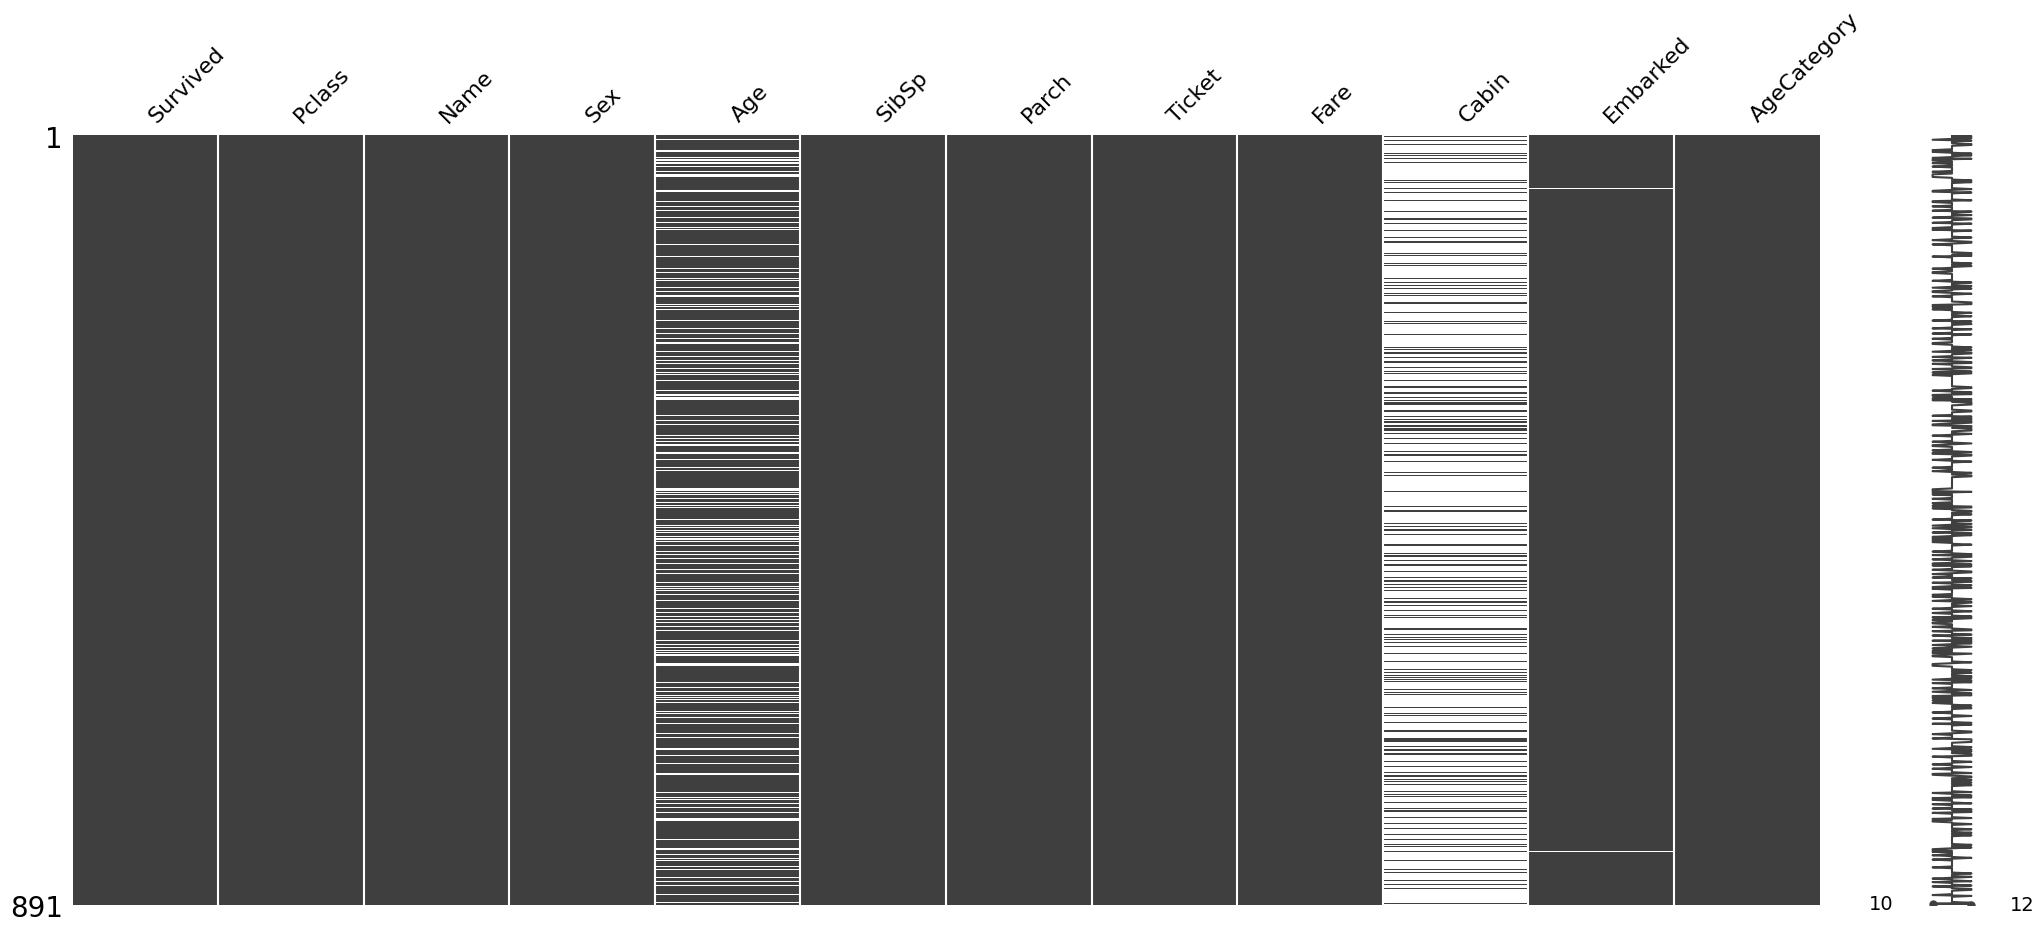

In [328]:
import missingno 
missingno.matrix(data)

**Выкинем признак Cabin. Столбец Age заполним медианным значением. Оставшиеся строки с пропусками удалим.**

In [329]:
data.drop('Cabin', axis=1, inplace=True)
data['Age'].fillna(data['Age'].median(), inplace=True)
data.dropna(inplace=True)


/tmp/ipykernel_55058/1298686516.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)


**Для категориальных переменных построить столбчатую диаграмму**

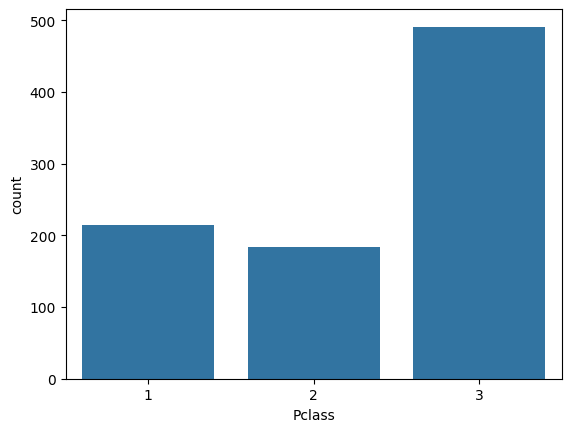

In [330]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Pclass', data=data)
plt.show()

**Постройте попарные зависимости (диаграммы рассеяния) для признаков `Age`, `Fare`, `Pclass`, `Sex`, `SibSp`, `Parch`, `Embarked` и `Survived`. (метод `scatter_matrix ` Pandas или `pairplot` Seaborn).**

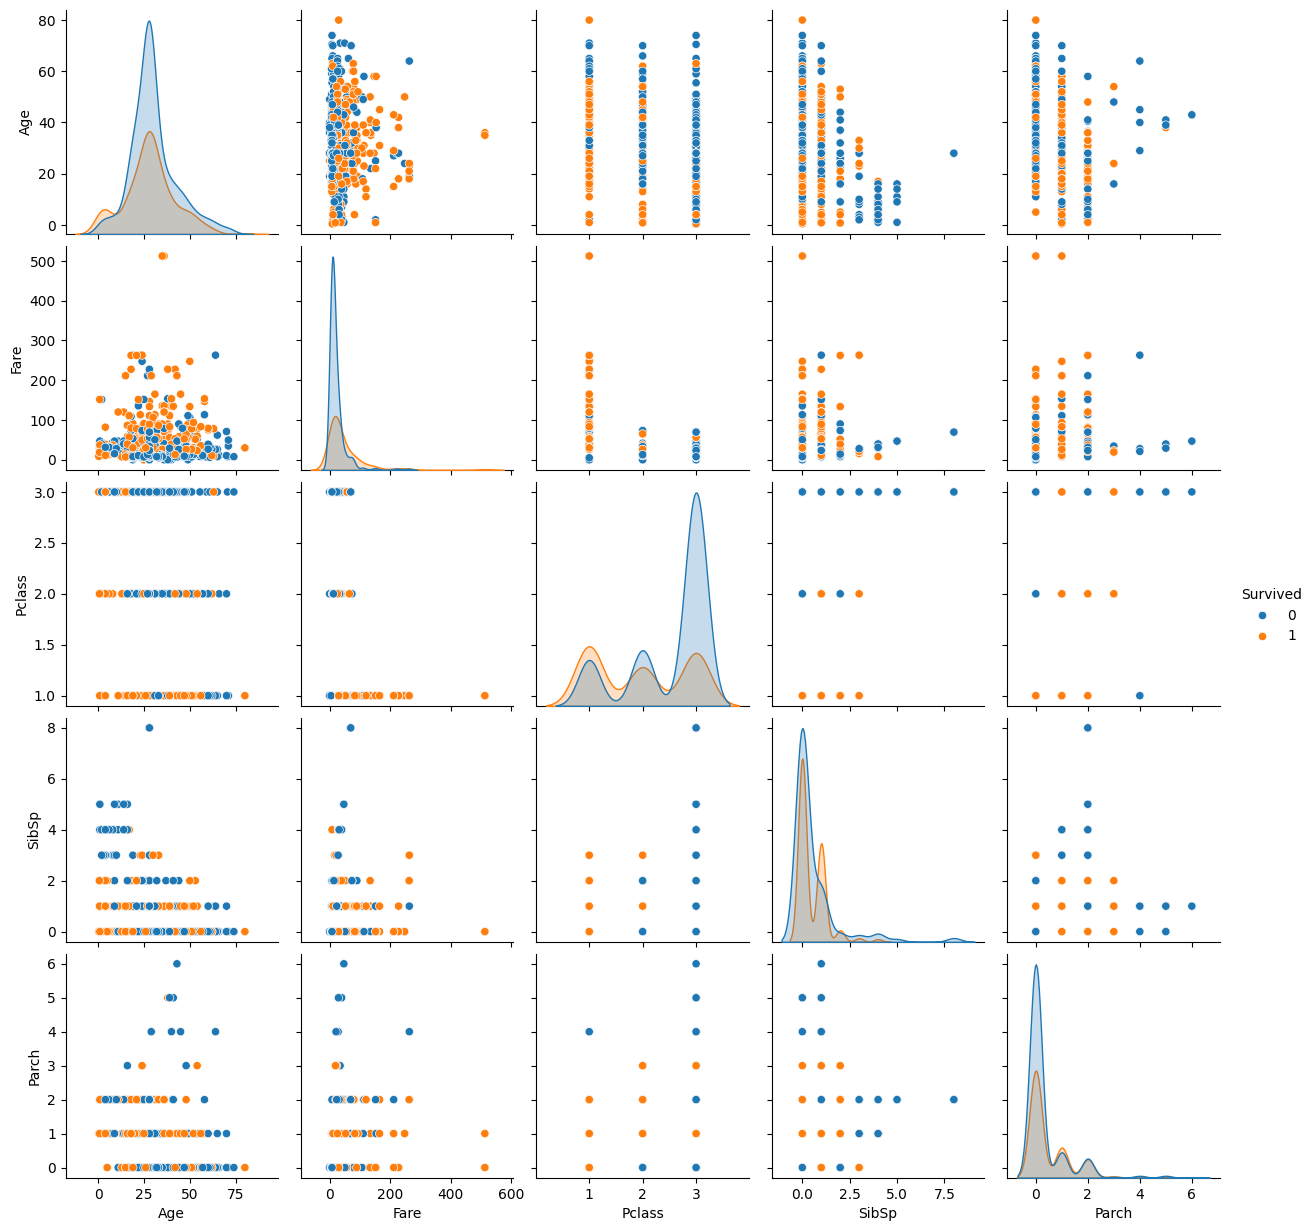

In [331]:
sns.pairplot(data[['Age', 'Fare', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Survived']],hue='Survived')
plt.show()

**Как плата за билет (`Fare`) зависит от класса каюты (`Pclass`)? Постройте boxplot.**

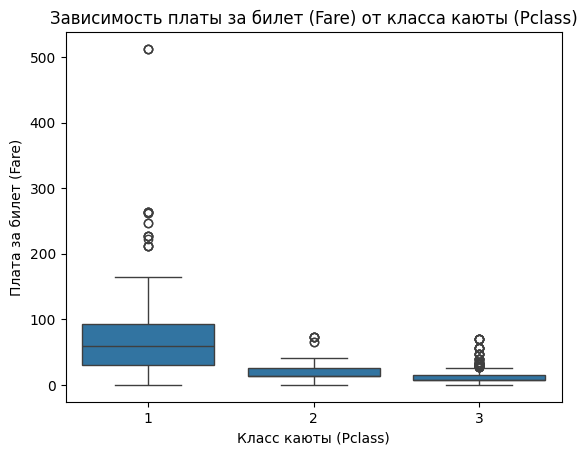

In [332]:
sns.boxplot(x='Pclass', y='Fare', data=data)

plt.title('Зависимость платы за билет (Fare) от класса каюты (Pclass)')
plt.xlabel('Класс каюты (Pclass)')
plt.ylabel('Плата за билет (Fare)')

plt.show()

**Такой boxplot получается не очень красивым из-за выбросов.**

**Опционально: создайте признак Fare_no_out (стоимости без выбросов), в котором исключаются стоимости, отличающиеся от средней по классу более чем на 2 стандартных отклонения. Важно: надо исключать выбросы именно в зависимости от класса каюты. Иначе исключаться будут только самые большие (1 класс) и малые (3 класс) стоимости. Постройте boxplot.**

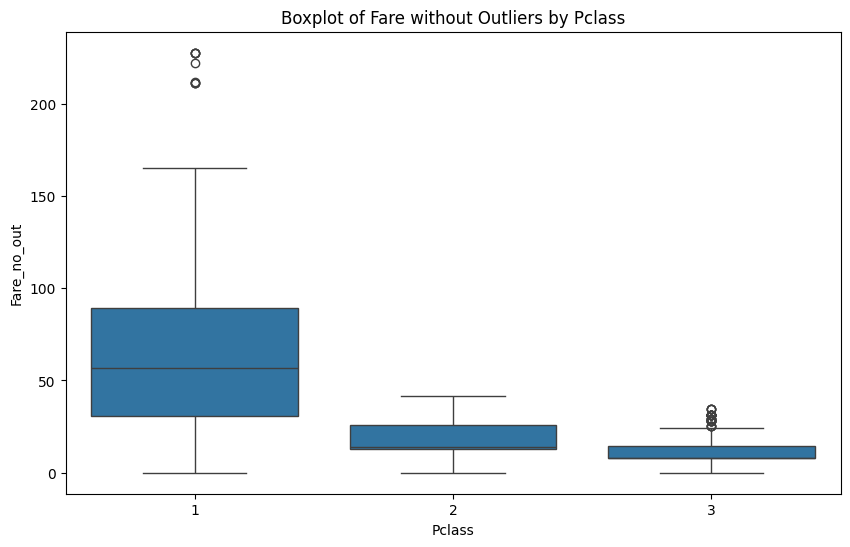

In [333]:
data['Fare_no_out'] = data['Fare']

def remove_outliers(group):
    mean = group.mean()
    std = group.std()
    return group[(group >= mean - 2 * std) & (group <= mean + 2 * std)]

fare_pclass1 = data[data['Pclass'] == 1]['Fare']
fare_pclass2 = data[data['Pclass'] == 2]['Fare']
fare_pclass3 = data[data['Pclass'] == 3]['Fare']

fare_pclass1_no_out = remove_outliers(fare_pclass1)
fare_pclass2_no_out = remove_outliers(fare_pclass2)
fare_pclass3_no_out = remove_outliers(fare_pclass3)

data['Fare_no_out'] = pd.concat([fare_pclass1_no_out, fare_pclass2_no_out, fare_pclass3_no_out])

plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare_no_out', data=data)
plt.title('Boxplot of Fare without Outliers by Pclass')
plt.show()



**Каково соотношение погибших и выживших в зависимости от пола? Отобразите c помощью Seaborn.countplot (столбчатая диаграмма) c аргументом hue.**

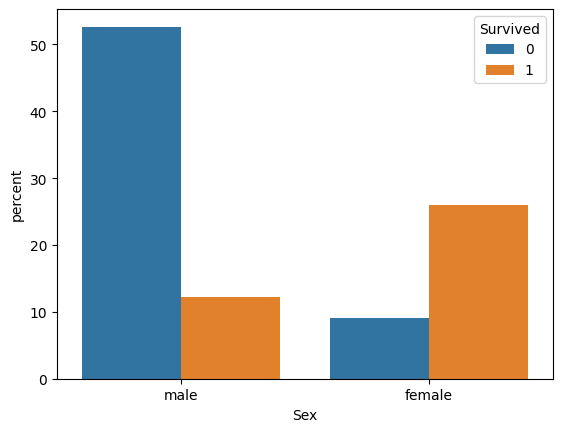

In [334]:
sns.countplot(x='Sex', hue='Survived', data=data, stat="percent")
plt.show()

**Каково соотношение погибших и выживших в зависимости от класса каюты? Отобразите c помощью Seaborn.countplot c аргументом hue.** 

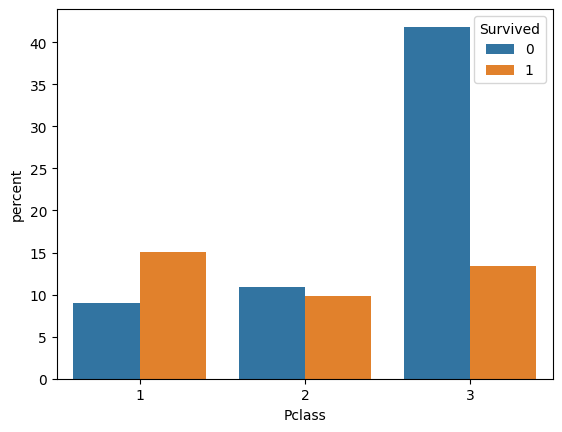

In [335]:
sns.countplot(x='Pclass', hue='Survived', data=data, stat="percent")
plt.show()

**Как факт выживания зависит от возраста пассажира? Проверьте (графически) предположение, что молодые чаще выживали. Пусть, условно, молодые - младше 30 лет, пожилые – старше 60 лет.**

/tmp/ipykernel_55058/513955383.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plt.bar((data.groupby('AgeGroup')['Survived'].mean() * 100).index, (data.groupby('AgeGroup')['Survived'].mean() * 100).values, color=['green', 'red', 'black'])


<BarContainer object of 3 artists>

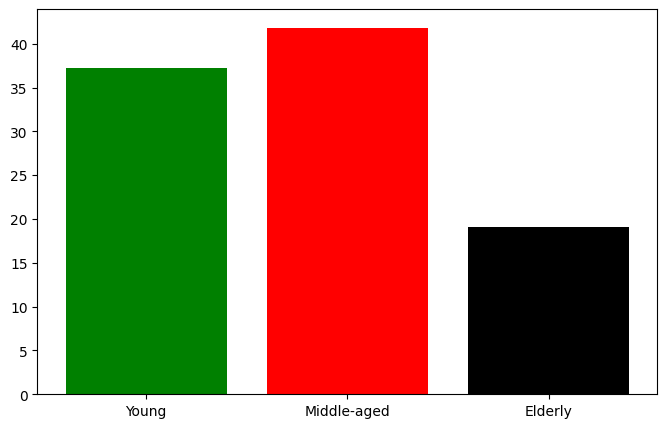

In [348]:
bins = [0, 30, 60, 100]
labels = ['Young', 'Middle-aged', 'Elderly']
data['AgeGroup'] = pd.cut(data['Age'], bins, labels=labels)

plt.figure(figsize=(8, 5))
plt.bar((data.groupby('AgeGroup')['Survived'].mean() * 100).index, (data.groupby('AgeGroup')['Survived'].mean() * 100).values, color=['green', 'red', 'black'])

# ????????????????????????????

# plt.figure(figsize=(8, 5))
# survival_rates = data.groupby('AgeCategory')['Survived'].mean() * 100
# plt.bar(survival_rates.index, survival_rates.values, color=['green', 'red', 'black'])

# plt.title('Процент выживших в каждой возрастной группе')
# plt.xlabel('Возрастная группа')
# plt.ylabel('Процент выживших')
# plt.xticks([1, 2, 3], ['Моложе 30', '30-60 лет', 'Старше 60'])
# plt.ylim(0, 100)

# for i, v in enumerate(survival_rates.values):
#     plt.text(i + 1, v + 2, f'{v:.1f}%', ha='center', fontsize=12)

# plt.show()

**Построить корреляционную матрицу. Выделить признаки, которые имень сильную корреляцию с целевой переменной**

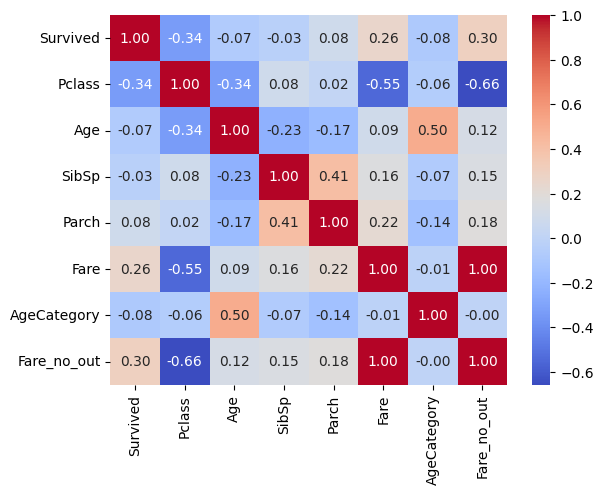

In [337]:
corr_matrix = data.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()